# ML Model for Available Stands

In [48]:
#import modules needed
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.ensemble as ensemble
import sklearn
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('availstands.csv', sep=',\s+', delimiter=',', skipinitialspace=True, index_col=0)

In [24]:
df.shape

(295906, 9)

### Data Formatting for Categorical Columns

In [25]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        data[column_name] = preprocessing.LabelEncoder().fit_transform(data[column_name])
    
    return data

In [26]:
list_le_cols=['description', 'Day', 'TimeOfDay']

In [27]:
dataBikes=sklearn.utils.shuffle(df)

In [28]:
dataBikes.head()

,available_bikes_stands,available_bikes,description,temp,temp_min,temp_max,humidity,Day,TimeOfDay
StationNumber,,,,,,,,,
87,38,0,mist,5,4,6,87,Tuesday,Evening
101,25,5,scattered clouds,11,11,12,62,Sunday,Afternoon
47,27,13,broken clouds,10,8,11,81,Tuesday,Morning
112,11,19,broken clouds,13,12,13,82,Monday,Evening
59,14,6,broken clouds,12,12,13,76,Saturday,Afternoon


In [29]:
dataBikes = label_enocder(df, list_le_cols)

### Split into features (x) and target variable (y)

In [30]:
X=dataBikes.drop(['available_bikes_stands'], axis=1)

In [31]:
y=dataBikes['available_bikes_stands']

### Test Design
- Split data into train, validation and test sets;


- __Training set__: Fit model to training set

    
- __Validation set__: Use the validation set to select the select best performing model (hyper-parameters tuning etc)


- __Test set__: Use test set to get an unbiased evaluation of the final model fit

In [32]:
#Set sizes
train_sizeX = 0.5
test_sizeX = 0.3
valid_sizeX = round((1.0 - (train_sizeX + test_sizeX)), 3)
#Combine train + valid
train_valid_size = train_sizeX + valid_sizeX
print('Training size = {}'.format(train_sizeX))
print('Validation size = {}'.format(valid_sizeX)) 
print('Test size = {}'.format(test_sizeX))

Training size = 0.5
Validation size = 0.2
Test size = 0.3


In [33]:
#Split Data
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, y, random_state=0, \
                                    train_size = train_sizeX + valid_sizeX)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = train_sizeX/train_valid_size)

__Function: to test model on validation data and using cross validation__

In [34]:
def model_performace_val_cv(model, X, y, X_valid, y_valid):
    '''
    Compute accuracy on validation set and using cross-validation
    
    Parameters:
    model, X, y, X_valid, y_valid

    
    '''
    print('Model = {}'.format(model))
    
    #1. Test on validation set
    
    #Predictions for the test data
    y_pred = model.predict(X_valid)
    
    #Validation accuracy
    validation_accuracy = metrics.accuracy_score(y_valid, y_pred)
    print("Validation Accuracy: " + str(validation_accuracy))
    
    #2. Cross validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross Validation (CV) accuracies: {}".format(cv_scores)) 
    print("Mean CV accuracy: {}".format(cv_scores.mean())) 
    print("Std CV accuracy: {}".format(cv_scores.std()))

##   Selection of Model Type

__Modelling technique: Ensemble Methods only__

- Only ensemble methods were tested given that they are the aggregate of multiple learning algorithms and therefore generally obtain a better predictive performance than could be obtained from any of the constituent learning algorithms alone

- Random Forest, Gradient Boosting, XGBoost were tested

__Approach Comparing models__:

- Models will be fit on the training set
- Predictions will be made on the validation set 
- Models will be compared using the accuracy given by the mean of the cross-validation models
- When comparing models the __default hyper-parameter settings__ will be used
- Once the final model is chosen then parameter tuning will be performed


### Model 1: Random Forrest Classifier

In [35]:
#Model
random_forest_classifier = RandomForestClassifier()
#Fit to data
random_forest_classifier.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(random_forest_classifier, X, y, X_valid, y_valid)

Model = RandomForestClassifier()
Validation Accuracy: 0.31683620019600556
Cross Validation (CV) accuracies: [0.20019601 0.17012217 0.10819351 0.06589953 0.19567091]
Mean CV accuracy: 0.14801642352780267
Std CV accuracy: 0.05255734318836372


### Model 2: Gradient Boosting Classifier

In [36]:
#Model
gradient_boosting_classifer = GradientBoostingClassifier()
#Fit to data
gradient_boosting_classifer.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(gradient_boosting_classifer, X, y, X_valid, y_valid)

Model = GradientBoostingClassifier()
Validation Accuracy: 0.37563786286370854
Cross Validation (CV) accuracies: [0.27719577 0.31425626 0.28046163 0.29053243 0.31984928]
Mean CV accuracy: 0.29645907573116714
Std CV accuracy: 0.017469742908040927


### Model 3: XGboost

In [37]:
#Model
xgboost_classifer = XGBClassifier()
#Fit to data
xgboost_classifer.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(xgboost_classifer, X, y, X_valid, y_valid)

[11:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Validation Accuracy: 0.38146733804197225
[11:38:14] WA

## Hyperparameter tuning

In [52]:
# #Grid Search
# param_grid = {'criterion': ['gini', "entropy"],
#              'n_estimators': list(range(100, 500, 100)),
#              'max_depth': list(range(3, 20, 5)),
#              }

In [53]:
# # Use Grid Search to determine best performing hyper-parameters
# tuned_GBC = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid, cv=5)
# tuned_GBC.fit(X_train, y) #Should have been y_train 

In [54]:
# final_model = GradientBoostingClassifier(n_estimators=300, criterion= 'entropy', max_depth=18)
# final_model.fit(X_train, y_train)

## Test Model on Test Set

In [60]:
y_predictedRFC = random_forest_classifier.predict(X_test)
y_predictedGBC=gradient_boosting_classifer.predict(X_test)
y_predictedXGB=xgboost_classifer.predict(X_test)

In [62]:
test_accuracyGBC = metrics.accuracy_score(y_test, y_predictedGBC)
test_accuracyGBC*100

37.56251971342316

In [63]:
test_accuracyXGB = metrics.accuracy_score(y_test, y_predictedXGB)
test_accuracyXGB*100

38.2767088721669

In [64]:
#Accuracy on the test set
test_accuracyRFC = metrics.accuracy_score(y_test, y_predictedRFC)
test_accuracyRFC*100

31.70143739016807

In [72]:
dfRFC=pd.DataFrame({'Actual':y_test, 'Predicted':y_predictedRFC})
dfRFC

,Actual,Predicted
StationNumber,,
26,8,28
12,17,17
94,38,18
91,10,18
27,7,17
...,...,...
29,14,25
75,26,26
43,13,13


In [73]:
dfGBX=pd.DataFrame({'Actual':y_test, 'Predicted':y_predictedGBC})
dfGBX

,Actual,Predicted
StationNumber,,
26,8,28
12,17,37
94,38,18
91,10,20
27,7,27
...,...,...
29,14,25
75,26,26
43,13,23


In [74]:
dfXGB=pd.DataFrame({'Actual':y_test, 'Predicted':y_predictedXGB})
dfXGB

,Actual,Predicted
StationNumber,,
26,8,28
12,17,37
94,38,18
91,10,20
27,7,17
...,...,...
29,14,25
75,26,26
43,13,13


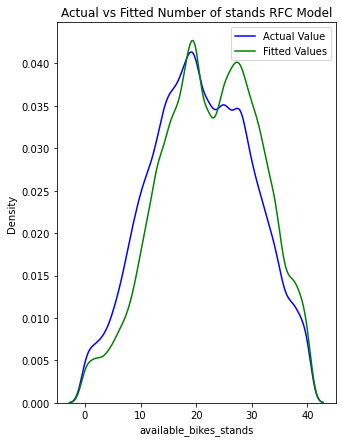

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_predictedRFC, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()

plt.title('Actual vs Fitted Number of stands RFC Model')


plt.show()
plt.close()

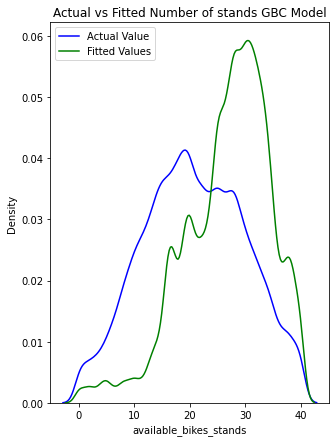

In [69]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_predictedGBC, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()

plt.title('Actual vs Fitted Number of stands GBC Model')


plt.show()
plt.close()

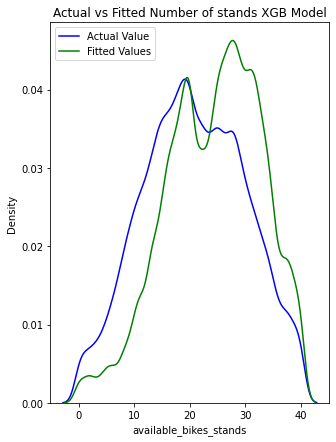

In [68]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_predictedXGB, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()

plt.title('Actual vs Fitted Number of stands XGB Model')


plt.show()
plt.close()